# Entanglement Capability

In this notebook I will calculate the mean Meyer-Wallach entanglement measure obtained for the different connectivities of circuits. For details on the Meyer-Wallach measure and associated properties/calculations, refer to the master's thesis.

The ansatzë here will be built with a sequence of RX and RY rotations interchanged with the appropriate connections, followed by again a sequence of RX and RY in each layer, named "Ansatz 2". The option of multilayering is built in the code.

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(42)

In [2]:
wires = 6 #number of qubits
dev = qml.device("default.qubit", wires=wires, shots=None)

# Function that compute mean Meyer-Wallach measure a.k.a. Entanglement Capability

In [3]:
def ent_cap(samples, circuit, nlayers):
    MW_mean = 0
    MW_mean_sqr = 0
    for i in range(samples):
        angles = np.array( [ [[np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)]] for j in range(nlayers)],
                           requires_grad = True)
        
        pur_sum = 0
        for k in range(wires):
            state = circuit(angles, k)
            pur_sum = pur_sum + np.trace(np.matmul(state, state))
    
        MW_measure = 2*(1-1/wires*pur_sum)
        MW_measure_sqr = MW_measure**2
        
        MW_mean = MW_mean + MW_measure
        MW_mean_sqr = MW_mean_sqr + MW_measure_sqr
        
    MW_mean = MW_mean/samples
    MW_mean_sqr = MW_mean_sqr/samples
    MW_standev = np.sqrt(MW_mean_sqr - MW_mean**2)
    return(MW_mean, MW_standev)

## Number of layers

In [4]:
nlayers = 1

# Circuits definition

## Identity circuit reference

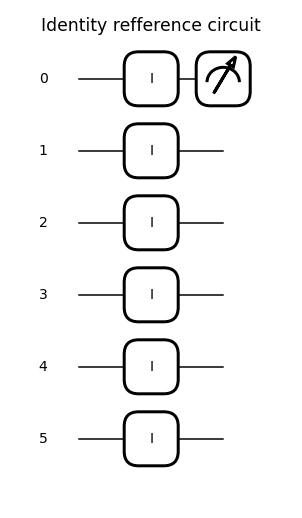

In [5]:
def identity(rots, k):
    for i in range(wires):
        qml.Identity(wires = [i])
    return qml.density_matrix([k])

identity_circuit = qml.QNode(identity, dev)

angles = np.array( [ [[np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)]] for j in range(nlayers)],
                           requires_grad = True)

qml.drawer.use_style('black_white')
fig1, ax1 = qml.draw_mpl(identity_circuit, decimals=2)(angles, 0)
fig1.suptitle("Identity refference circuit", fontsize='xx-large')
plt.show()

## No connection circuit

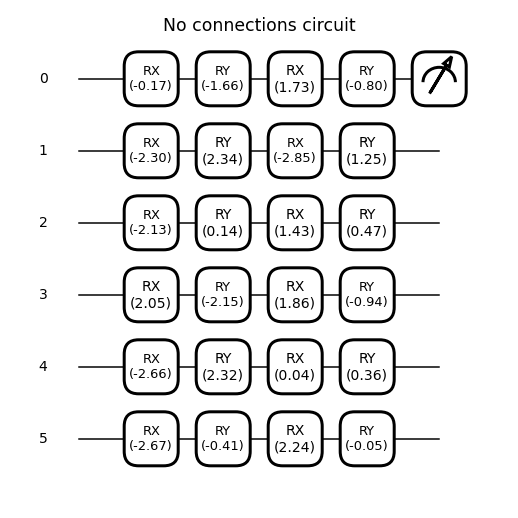

In [6]:
#Layer definition

def layer_noconnec(rots):
    for i in range(wires):
        qml.RX(rots[0][i], wires=[i])
        qml.RY(rots[1][i], wires=[i])
        qml.RX(rots[2][i], wires=[i])
        qml.RY(rots[3][i], wires=[i])
        
# Circuit definition:        
        
def noconnec(rotations, k):
    qml.layer(layer_noconnec, nlayers, rotations)
    return qml.density_matrix([k])

noconnec_circuit = qml.QNode(noconnec, dev)

angles = np.array( [ [[np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)]] for j in range(nlayers)],
                           requires_grad = True)

qml.drawer.use_style('black_white')
fig1, ax1 = qml.draw_mpl(noconnec_circuit, decimals=2)(angles, 0)
fig1.suptitle("No connections circuit", fontsize='xx-large')
plt.show()

## Linear connections

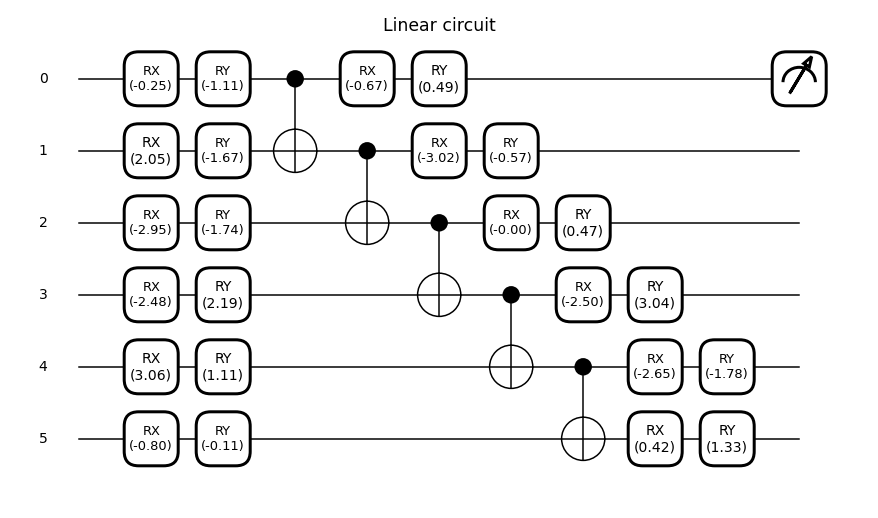

In [7]:
#Layer definition

def layer_linear(rots):
    for i in range(wires):
        qml.RX(rots[0][i], wires=[i])
        qml.RY(rots[1][i], wires=[i])
    qml.broadcast(qml.CNOT, wires=range(wires), pattern="chain")
    for i in range(wires):
        qml.RX(rots[2][i], wires=[i])
        qml.RY(rots[3][i], wires=[i])

#Circuit definition

def linear(rotations, k):
    qml.layer(layer_linear, nlayers, rotations)
    return qml.density_matrix([k])

linear_circuit = qml.QNode(linear, dev)

angles = np.array( [ [[np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)]] for j in range(nlayers)],
                           requires_grad = True)

qml.drawer.use_style('black_white')
fig1, ax1 = qml.draw_mpl(linear_circuit, decimals=2)(angles, 0)
fig1.suptitle("Linear circuit", fontsize='xx-large')
plt.show()

## Ring connections ('oriented')

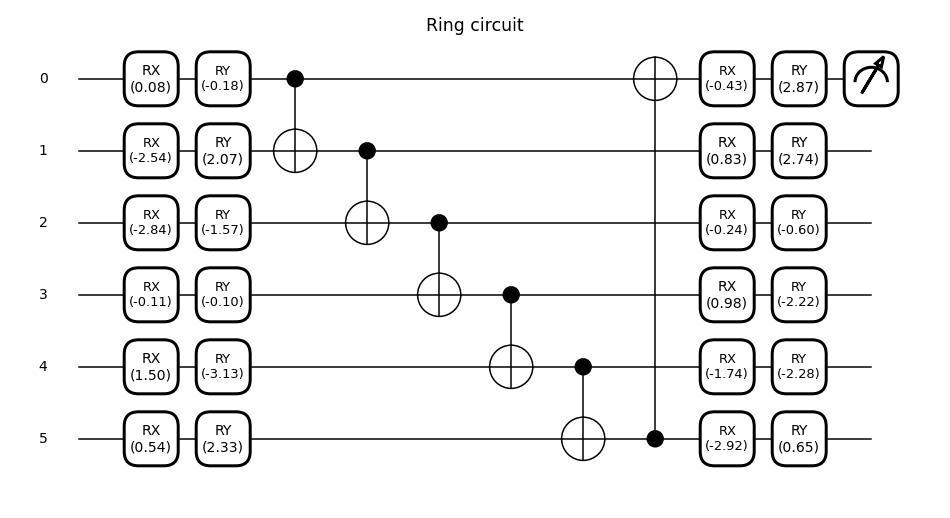

In [8]:
#Layer definition

def layer_ring(rots):
    for i in range(wires):
        qml.RX(rots[0][i], wires=[i])
        qml.RY(rots[1][i], wires=[i])
    qml.broadcast(qml.CNOT, wires=range(wires), pattern="chain")
    qml.CNOT(wires=[wires-1,0])
    for i in range(wires):
        qml.RX(rots[2][i], wires=[i])
        qml.RY(rots[3][i], wires=[i])

# Circuit definition:

def ring(rotations, k):
    qml.layer(layer_ring, nlayers, rotations)
    return qml.density_matrix([k])

ring_circuit = qml.QNode(ring, dev)

angles = np.array( [ [[np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)]] for j in range(nlayers)],
                           requires_grad = True)

qml.drawer.use_style('black_white')
fig1, ax1 = qml.draw_mpl(ring_circuit, decimals=2)(angles, 0)
fig1.suptitle("Ring circuit", fontsize='xx-large')
plt.show()

## Star connections

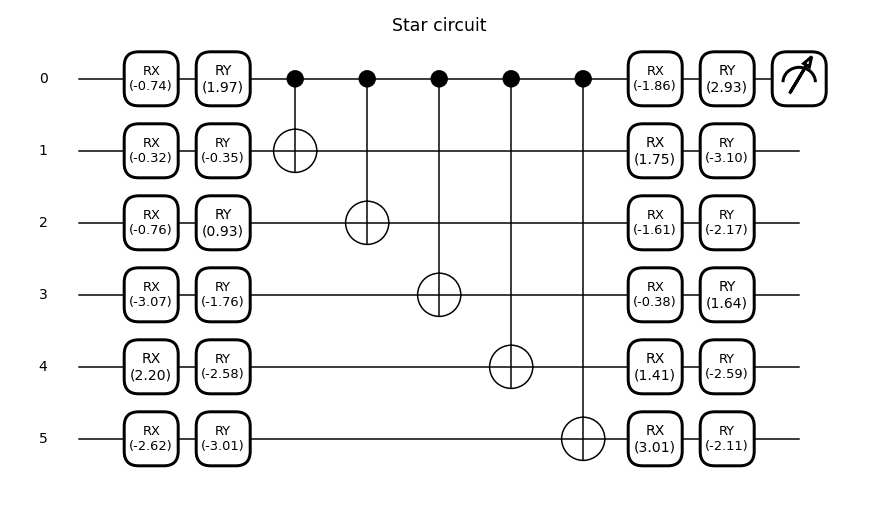

In [9]:
#Layer definition

def layer_star(rots):
    for i in range(wires):
        qml.RX(rots[0][i], wires=[i])
        qml.RY(rots[1][i], wires=[i])
    for i in range(wires-1):
        qml.CNOT(wires = [0, i+1])
    for i in range(wires):
        qml.RX(rots[2][i], wires=[i])
        qml.RY(rots[3][i], wires=[i])


#Circuit definition

def star(rotations, k):
    qml.layer(layer_star, nlayers, rotations)
    return qml.density_matrix([k])

star_circuit = qml.QNode(star, dev)

angles = np.array( [ [[np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)]] for j in range(nlayers)],
                           requires_grad = True)

qml.drawer.use_style('black_white')
fig1, ax1 = qml.draw_mpl(star_circuit, decimals=2)(angles, 0)
fig1.suptitle("Star circuit", fontsize='xx-large')
plt.show()

## All-to-all connections

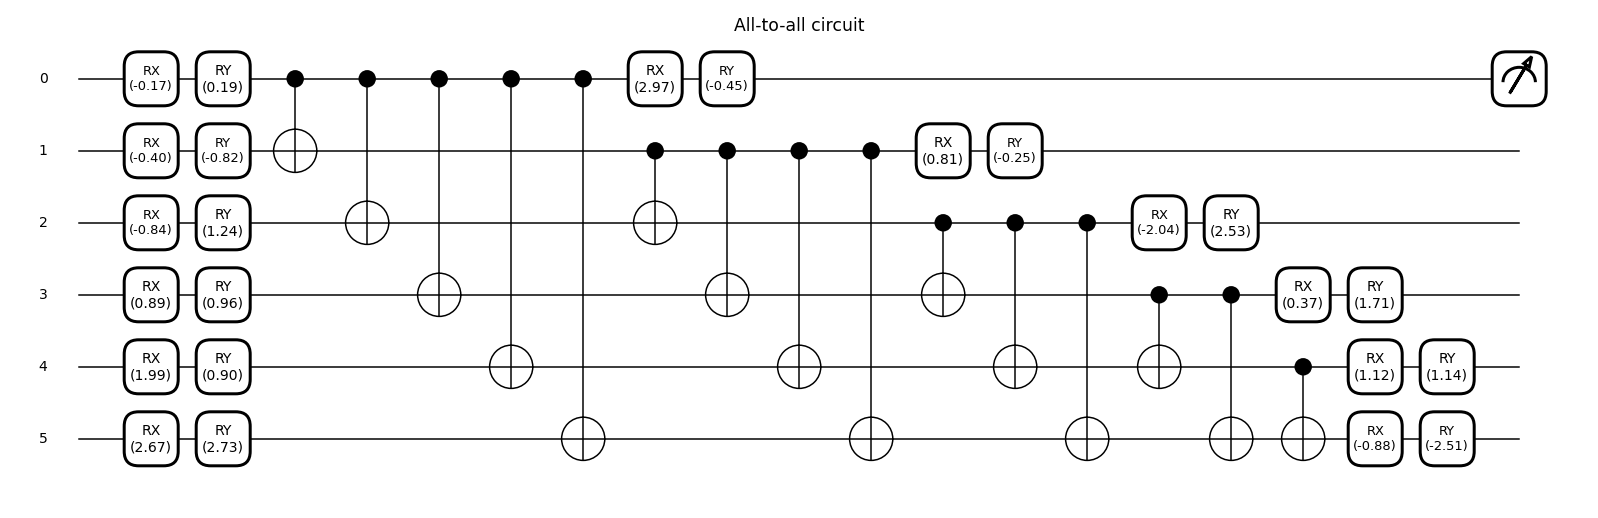

In [10]:
#Layer definition

def layer_alltoall(rots):
    for i in range(wires):
        qml.RX(rots[0][i], wires=[i])
        qml.RY(rots[1][i], wires=[i])
    qml.broadcast(qml.CNOT, wires=range(wires), pattern="all_to_all")
    for i in range(wires):
        qml.RX(rots[2][i], wires=[i])
        qml.RY(rots[3][i], wires=[i])

# Circuit Definition:

def alltoall(rotations, k):
    qml.layer(layer_alltoall, nlayers, rotations)
    return qml.density_matrix([k])

alltoall_circuit = qml.QNode(alltoall, dev)

angles = np.array( [ [[np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)],
                   [np.random.uniform(low=-np.pi, high=np.pi) for i in range(wires)]] for j in range(nlayers)],
                           requires_grad = True)


qml.drawer.use_style('black_white')
fig1, ax1 = qml.draw_mpl(alltoall_circuit, decimals=2)(angles, 0)
fig1.suptitle("All-to-all circuit", fontsize='xx-large')
plt.show()

## Parameters

In [11]:
samples = 250

# Meyer-Wallach means

## Identity circuit refference

In [12]:
ent_identity, ent_identity_standev  = ent_cap(samples, identity_circuit, nlayers)
print(ent_identity)
print(ent_identity_standev)

0j
0j


## No connection

In [13]:
ent_noconnec, ent_noconnec_standev = ent_cap(samples, noconnec_circuit, nlayers)
print(ent_noconnec)
print(ent_noconnec_standev)

(1.341149413747189e-16+0j)
(1.6368646348055175e-15+0j)


## Linear

In [14]:
ent_linear, ent_linear_standev = ent_cap(samples, linear_circuit, nlayers)
print(ent_linear)
print(ent_linear_standev)

(0.8263429688529312+0j)
(0.10767450737691801+0j)


## Ring ('oriented')

In [15]:
ent_ring, ent_ring_standev = ent_cap(samples, ring_circuit, nlayers)
print(ent_ring)
print(ent_ring_standev)

(0.9213711199071897+0j)
(0.07016342642161257+0j)


## Star

In [16]:
ent_star, ent_star_standev = ent_cap(samples, star_circuit, nlayers)
print(ent_star)
print(ent_star_standev)

(0.6085675387484035+0j)
(0.2372306209985273+0j)


## All-to-all

In [17]:
ent_alltoall, ent_alltoall_standev = ent_cap(samples, alltoall_circuit, nlayers)
print(ent_alltoall)
print(ent_alltoall_standev)

(0.8226813128884178+0j)
(0.11316771435906418+0j)


/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'MW mean')

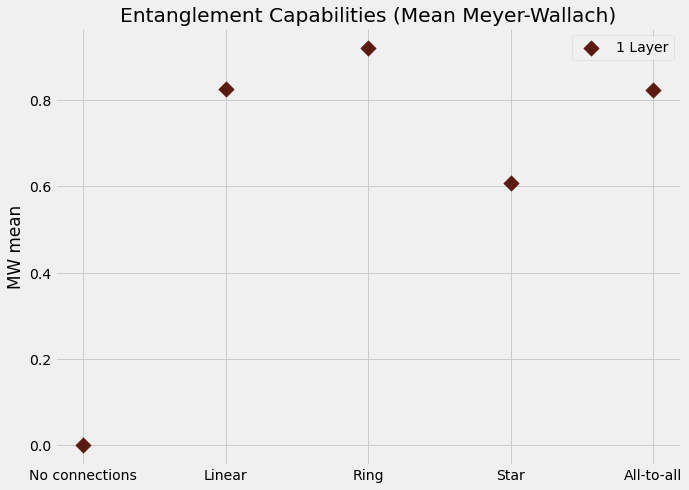

In [18]:
plt.style.use('fivethirtyeight')

# entanglements
ent_capabilities = [ent_noconnec, ent_linear, ent_ring, ent_star, ent_alltoall]

# circuits type
circuits = ["No connections", "Linear", "Ring", "Star", "All-to-all"]

fig = plt.figure(figsize = (10, 7.5))
ax = fig.add_subplot(111)

ax.scatter(circuits, ent_capabilities, s = 120, marker = 'D', color ='#5A1A0F', label = '1 Layer')
#ax.scatter(circuits, express2L, s = 180, marker = '<', color="#F2691C", label = '2 Layers')
ax.legend()

ax.title.set_text('Entanglement Capabilities (Mean Meyer-Wallach)')

ax.set_ylabel('MW mean')

#fig.savefig('Multiple_layers_expressibility.pdf')

In [19]:
f = open("entanglement_ansatz2_qubits{0}_layers{1}_samples{2}.txt".format(wires,nlayers, samples), "w")

print('Circuit,MW_mean,MW_standdev', file = f)
print('Identity,', ent_identity,',', ent_identity_standev, file = f)
print('No connections,',ent_noconnec,',', ent_noconnec_standev, file = f)
print('Linear,',ent_linear,',', ent_linear_standev, file = f)
print('Ring,',ent_ring,',', ent_ring_standev, file = f)
print('Star,',ent_star,',', ent_star_standev, file = f)
print('All-to-all,',ent_alltoall,',', ent_alltoall_standev, file = f)